# Homework 6
You need to classify digits with SVM models in this homework. Use PCA to reduce data dimensionality (80% information remain). Compare performance of linear, radial, and polynomial kernals. Tune kernal parameters using Randomsearch method.

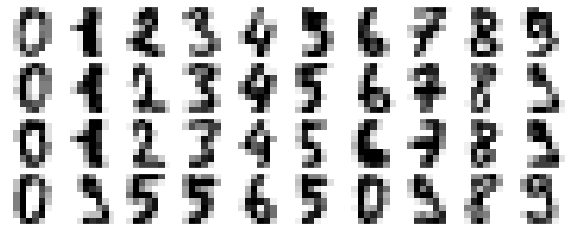

In [46]:
%matplotlib inline
#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

array([ 1,  3,  6, 10, 15, 21], dtype=int32)

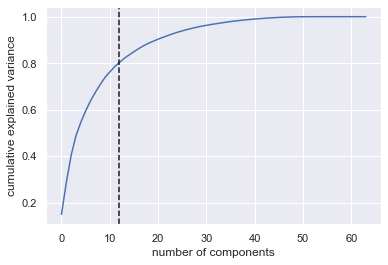

In [47]:
# Look at the graph of the cumulative explained variance ratio against the number of principal components.
# This code came from the PCA example code from class.
pca = PCA().fit(digits.data)
evr = np.cumsum(pca.explained_variance_ratio_)
plt.plot(evr)
plt.axvline(x = 12, color = 'k', ls='--')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Return the cumulative sum of the elements along a given axis.
a = np.array([[1,2,3], [4,5,6]])
np.cumsum(a)

From the above chart, we can see that we'll need around 12 principal components in order to retain 80% of the information.

In [48]:
# Keep 80 percent of the information (which from the graph above we see will be about 12 principal components).
pca = PCA(n_components=0.8)

# So that we can get accuracy, split the data into test and training set ()
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,random_state=42)

# Linear
svc_linear = SVC(kernel='linear',class_weight='balanced')
linear_model = make_pipeline(pca, svc_linear)
C = [1, 10, 100, 1000]

linear = RandomizedSearchCV(estimator = linear_model, param_distributions = {'svc__C':C}, n_iter = 4, n_jobs = 4, cv=5)
linear.fit(Xtrain,ytrain)

accuracy_linear = linear.score(Xtest,ytest)

# Polynomial
svc_poly = SVC(kernel='poly',class_weight='balanced')
poly_model = make_pipeline(pca, svc_poly)
degree = [1,2,3,4]

poly = RandomizedSearchCV(estimator = poly_model, param_distributions = {'svc__C':C,'svc__degree':degree}, n_jobs = 5, cv=5)
poly.fit(Xtrain,ytrain)

accuracy_poly = poly.score(Xtest,ytest)

# RBF
svc_rbf = SVC(kernel='rbf',class_weight='balanced')
rbf_model = make_pipeline(pca, svc_rbf)
gamma = [0.1, 0.01, 0.001, 0.0001]

rbf = RandomizedSearchCV(estimator = rbf_model, param_distributions = {'svc__C':C,'svc__gamma':gamma}, n_jobs = 5, cv=5)
rbf.fit(Xtrain,ytrain)

accuracy_rbf = rbf.score(Xtest,ytest)

print('Linear best parameters: ' + repr(linear.best_params_))
print('Linear test set accuracy: ' + repr(accuracy_linear))
print('Poly best parameters: ' + repr(poly.best_params_))
print('Poly test set accuracy: ' + repr(accuracy_poly))
print('RBF best parameters: ' + repr(rbf.best_params_))
print('RBF test set accuracy: ' + repr(accuracy_rbf))

Linear best parameters: {'svc__C': 10}
Linear test set accuracy: 0.9577777777777777
Poly best parameters: {'svc__degree': 3, 'svc__C': 100}
Poly test set accuracy: 0.9755555555555555
RBF best parameters: {'svc__gamma': 0.001, 'svc__C': 100}
RBF test set accuracy: 0.9822222222222222


We see that the best kernel is RBF with the above values for C and gamma, based on 5 fold cross validation. The accuracy results on the test data is 98.2%!